<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [1]:
#ANS_1
import numpy as np
import torchvision.datasets as datasets

# Load MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

# Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

# Define the architecture
def ReLu(inp):
    return np.maximum(0, inp)

def gradReLu(inp):
    return (inp > 0).astype(int)

def softmax(inp):
    exps = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def fwdPropagate(inputs, weights):
    W1, W2, W3 = weights

    # Flatten the input
    inputs_flat = inputs.reshape(inputs.shape[0], -1)

    # First hidden layer
    h1 = ReLu(np.dot(inputs_flat, W1.T))

    # Second hidden layer
    h2 = ReLu(np.dot(h1, W2.T))

    # Output layer
    out = softmax(np.dot(h2, W3.T))

    return out, [h1, h2]

def computeGradients(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    h1, h2 = activations

    # Flatten the input
    inputs_flat = inputs.reshape(inputs.shape[0], -1)

    # Forward propagation
    z1 = np.dot(inputs_flat, W1.T)
    h1 = ReLu(z1)
    z2 = np.dot(h1, W2.T)
    h2 = ReLu(z2)
    out = softmax(np.dot(h2, W3.T))

    # Compute the loss
    loss = -np.mean(np.log(out[np.arange(len(targets)), targets]))

    # Compute the gradient of the loss with respect to the output of the network
    grad_output = out.copy()
    grad_output[np.arange(len(targets)), targets] -= 1
    grad_output /= len(targets)

    # Backpropagation
    grad_W3 = np.dot(h2.T, grad_output)
    grad_h2 = np.dot(grad_output, W3) * gradReLu(h2)
    grad_W2 = np.dot(h1.T, grad_h2)
    grad_h1 = np.dot(grad_h2, W2) * gradReLu(h1)
    grad_W1 = np.dot(inputs_flat.T, grad_h1)

    return [grad_W1, grad_W2, grad_W3]


def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    grad_W1, grad_W2, grad_W3 = gradients

    # Update the weights using gradient descent
    W1 -= learning_rate * grad_W1.T
    W2 -= learning_rate * grad_W2.T
    W3 -= learning_rate * grad_W3.T

    return [W1, W2, W3]


def backPropagate(inputs, targets, weights, activations, learning_rate):
    # Compute gradients
    gradients = computeGradients(inputs, targets, weights, activations)

    # Update weights
    weights = applyGradients(weights, gradients, learning_rate)

    return weights

# Train the network
def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    # Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784)
    W2 = np.random.randn(hidden_units, hidden_units)
    W3 = np.random.randn(n_classes, hidden_units)
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        shuffled_indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[shuffled_indices]
        targets_shuffled = targets_idx[shuffled_indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            batch_inputs = inputs_shuffled[start_idx:end_idx]
            batch_targets = targets_shuffled[start_idx:end_idx]

            # Forward propagation
            outputs, activations = fwdPropagate(batch_inputs, weights)

            # Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate)

        # Compute outputs on training data
        train_outputs, _ = fwdPropagate(inputs_shuffled, weights)
        train_predictions = np.argmax(train_outputs, axis=1)

        # Compute training accuracy and loss
        train_accuracy = np.mean(train_predictions == targets_shuffled)
        train_loss = -np.mean(np.log(train_outputs[np.arange(len(targets_shuffled)), targets_shuffled]))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    return weights

# Call the training function to train the network
trained_weights = training(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=10, learning_rate=0.001)
def evaluate(inputs, targets, weights):
    # Compute outputs on test data
    test_outputs, _ = fwdPropagate(inputs, weights)
    test_predictions = np.argmax(test_outputs, axis=1)

    # Compute test accuracy and loss
    test_accuracy = np.mean(test_predictions == targets)
    test_loss = -np.mean(np.log(test_outputs[np.arange(len(targets)), targets]))

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Evaluate the performance on test data
evaluate(mnist_testdata, mnist_testlabel, trained_weights)


100%|██████████| 9912422/9912422 [00:00<00:00, 68392690.28it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 83312031.52it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 20720592.38it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 926221.74it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


<ipython-input-1-82679efb2ec0>:64: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(np.log(out[np.arange(len(targets)), targets]))


Epoch 1/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 2/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 3/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 4/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 5/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 6/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 7/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 8/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 9/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Epoch 10/10, Train Loss: 2.3024, Train Accuracy: 0.0988
Test Loss: inf, Test Accuracy: 0.0981


<ipython-input-1-82679efb2ec0>:158: RuntimeWarning: divide by zero encountered in log
  test_loss = -np.mean(np.log(test_outputs[np.arange(len(targets)), targets]))


<b> Report your observations </b>
1. Training stagnation: The model fails to improve during training, with both loss and accuracy remaining constant over epochs, suggesting ineffective learning.

2. Testing failure: During evaluation, the model's loss becomes infinite, indicating issues with prediction probabilities, leading to poor accuracy similar to random guessing.

3. Need for optimization: Initialization, learning rate, and model complexity are potential areas for improvement to enhance training stability and generalization.


<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [2]:
#ANS_2
import numpy as np
import torchvision.datasets as datasets

# Load MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()

# Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

# Define the architecture with different activation functions
def sigmoid(inp, derivative=False):
    if derivative:
        return inp * (1 - inp)
    return 1 / (1 + np.exp(-inp))

def tanh(inp, derivative=False):
    if derivative:
        return 1 - inp ** 2
    return np.tanh(inp)

def ReLu(inp, derivative=False):
    if derivative:
        return np.where(inp > 0, 1, 0)
    return np.maximum(0, inp)

def leaky_ReLu(inp, derivative=False, alpha=0.01):
    if derivative:
        return np.where(inp > 0, 1, alpha)
    return np.where(inp > 0, inp, alpha * inp)

def softmax(inp):
    exps = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def fwdPropagate(inputs, weights, activation_function):
    W1, W2, W3 = weights

    # Flatten the input
    inputs_flat = inputs.reshape(inputs.shape[0], -1)

    # First hidden layer
    h1 = activation_function(np.dot(inputs_flat, W1.T))

    # Second hidden layer
    h2 = activation_function(np.dot(h1, W2.T))

    # Output layer
    out = softmax(np.dot(h2, W3.T))

    return out, [h1, h2]

def computeGradients(inputs, targets, weights, activations, activation_function):
    W1, W2, W3 = weights
    h1, h2 = activations

    # Flatten the input
    inputs_flat = inputs.reshape(inputs.shape[0], -1)

    # Forward propagation
    z1 = np.dot(inputs_flat, W1.T)
    h1 = activation_function(z1)
    z2 = np.dot(h1, W2.T)
    h2 = activation_function(z2)
    out = softmax(np.dot(h2, W3.T))

    # Compute the loss
    loss = -np.mean(np.log(out[np.arange(len(targets)), targets]))

    # Compute the gradient of the loss with respect to the output of the network
    grad_output = out.copy()
    grad_output[np.arange(len(targets)), targets] -= 1
    grad_output /= len(targets)

    # Backpropagation
    grad_W3 = np.dot(h2.T, grad_output)
    grad_h2 = np.dot(grad_output, W3) * activation_function(z2, derivative=True)
    grad_W2 = np.dot(h1.T, grad_h2)
    grad_h1 = np.dot(grad_h2, W2) * activation_function(z1, derivative=True)
    grad_W1 = np.dot(inputs_flat.T, grad_h1)

    return [grad_W1, grad_W2, grad_W3]

def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    grad_W1, grad_W2, grad_W3 = gradients

    # Update the weights using gradient descent
    W1 -= learning_rate * grad_W1.T
    W2 -= learning_rate * grad_W2.T
    W3 -= learning_rate * grad_W3.T

    return [W1, W2, W3]

def backPropagate(inputs, targets, weights, activations, learning_rate, activation_function):
    # Compute gradients
    gradients = computeGradients(inputs, targets, weights, activations, activation_function)

    # Update weights
    weights = applyGradients(weights, gradients, learning_rate)

    return weights

# Train the network with different activation functions
def train_network(inputs, targets, activation_function, batch_size=128, epochs=10, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    # Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784)
    W2 = np.random.randn(hidden_units, hidden_units)
    W3 = np.random.randn(n_classes, hidden_units)
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        shuffled_indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[shuffled_indices]
        targets_shuffled = targets[shuffled_indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            batch_inputs = inputs_shuffled[start_idx:end_idx]
            batch_targets = targets_shuffled[start_idx:end_idx]

            # Forward propagation
            outputs, activations = fwdPropagate(batch_inputs, weights, activation_function)

            # Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate, activation_function)

        # Compute outputs on training data
        train_outputs, _ = fwdPropagate(inputs_shuffled, weights, activation_function)
        train_predictions = np.argmax(train_outputs, axis=1)

        # Compute training accuracy and loss
        train_accuracy = np.mean(train_predictions == targets_shuffled)
        train_loss = -np.mean(np.log(train_outputs[np.arange(len(targets_shuffled)), targets_shuffled]))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    return weights

# Evaluate the performance on MNIST test data
def evaluate(inputs, targets, weights, activation_function):
    # Compute outputs on test data
    test_outputs, _ = fwdPropagate(inputs, weights, activation_function)
    test_predictions = np.argmax(test_outputs, axis=1)

    # Compute test accuracy
    test_accuracy = np.mean(test_predictions == targets)

    return test_accuracy

# Train and evaluate the network with different activation functions
activation_functions = [sigmoid, tanh, ReLu, leaky_ReLu]
activation_names = ['Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU']

for i, activation_function in enumerate(activation_functions):
    print(f"\nTraining with {activation_names[i]} activation function:")
    trained_weights = train_network(mnist_traindata, mnist_trainlabel, activation_function, epochs=10, learning_rate=0.001)
    accuracy = evaluate(mnist_testdata, mnist_testlabel, trained_weights, activation_function)
    print(f"Accuracy on MNIST test data with {activation_names[i]} activation function: {accuracy:.4f}")



Training with Sigmoid activation function:


<ipython-input-2-8b1e163bfe3d>:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-inp))
<ipython-input-2-8b1e163bfe3d>:20: RuntimeWarning: overflow encountered in multiply
  return inp * (1 - inp)


Epoch 1/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 2/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 3/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 4/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 5/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 6/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 7/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 8/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 9/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 10/10, Train Loss: nan, Train Accuracy: 0.0987
Accuracy on MNIST test data with Sigmoid activation function: 0.0980

Training with Tanh activation function:


<ipython-input-2-8b1e163bfe3d>:25: RuntimeWarning: overflow encountered in square
  return 1 - inp ** 2


Epoch 1/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 2/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 3/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 4/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 5/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 6/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 7/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 8/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 9/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 10/10, Train Loss: nan, Train Accuracy: 0.0987
Accuracy on MNIST test data with Tanh activation function: 0.0980

Training with ReLU activation function:


<ipython-input-2-8b1e163bfe3d>:74: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(np.log(out[np.arange(len(targets)), targets]))


Epoch 1/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 2/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 3/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 4/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 5/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 6/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 7/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 8/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 9/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Epoch 10/10, Train Loss: 2.3026, Train Accuracy: 0.0987
Accuracy on MNIST test data with ReLU activation function: 0.0980

Training with Leaky ReLU activation function:
Epoch 1/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 2/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 3/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 4/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 5/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 6/10, Train Loss: nan, Train Accuracy: 0.0987
Epoch 7/10, Train Loss: 

<b> Report your observations </b>

1. Sigmoid and Tanh activation functions encountered overflow errors, indicating numerical instability.
2. ReLU activation function resulted in no significant improvement in accuracy, suggesting potential vanishing gradient issues.
3. Activation function choice plays a crucial role in training dynamics and model performance, highlighting the need for experimentation and consideration of dataset characteristics.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
#ANS_3
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

# Load MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()

# Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

# Define activation functions
def ReLU(x, derivative=False):
    if derivative:
        return np.where(x <= 0, 0, 1)
    else:
        return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Forward propagation
def fwdPropagate(inputs, weights, activation):
    W1, W2, W3 = weights

    # Flatten the input
    inputs_flat = inputs.reshape(inputs.shape[0], -1)

    # First hidden layer
    z1 = np.dot(inputs_flat, W1.T)
    h1 = activation(z1)

    # Second hidden layer
    z2 = np.dot(h1, W2.T)
    h2 = activation(z2)

    # Output layer
    out = softmax(np.dot(h2, W3.T))

    return out, [h1, h2]

# Compute gradients
def computeGradients(inputs, targets, weights, activations, activation_function):
    W1, W2, W3 = weights
    h1, h2 = activations

    # Flatten the input
    inputs_flat = inputs.reshape(inputs.shape[0], -1)

    # Forward propagation
    z1 = np.dot(inputs_flat, W1.T)
    h1 = activation_function(z1)
    z2 = np.dot(h1, W2.T)
    h2 = activation_function(z2)
    out = softmax(np.dot(h2, W3.T))

    # Compute the loss
    loss = -np.mean(np.log(out[np.arange(len(targets)), targets]))

    # Compute the gradient of the loss with respect to the output of the network
    grad_output = out.copy()
    grad_output[np.arange(len(targets)), targets] -= 1
    grad_output /= len(targets)

    # Backpropagation
    grad_W3 = np.dot(h2.T, grad_output)
    grad_h2 = np.dot(grad_output, W3) * activation_function(z2, derivative=True)
    grad_W2 = np.dot(h1.T, grad_h2)
    grad_h1 = np.dot(grad_h2, W2) * activation_function(z1, derivative=True)
    grad_W1 = np.dot(inputs_flat.T, grad_h1)

    return [grad_W1, grad_W2, grad_W3]

# Update parameters with SGD
def applyGradientsSGD(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    grad_W1, grad_W2, grad_W3 = gradients

    W1 -= learning_rate * grad_W1.T
    W2 -= learning_rate * grad_W2.T
    W3 -= learning_rate * grad_W3.T

    return [W1, W2, W3]

# Update parameters with Adam
def applyGradientsAdam(weights, gradients, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    W1, W2, W3 = weights
    grad_W1, grad_W2, grad_W3 = gradients

    m_W1, m_W2, m_W3 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)
    v_W1, v_W2, v_W3 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)
    t = 0

    for param, grad_param in zip([W1, W2, W3], [grad_W1, grad_W2, grad_W3]):
        t += 1
        m = beta1 * m + (1 - beta1) * grad_param
        v = beta2 * v + (1 - beta2) * (grad_param ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        param -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return [W1, W2, W3]

# Train the network with SGD optimizer
def training(inputs, targets_idx, batch_size=128, epochs=10, learning_rate=0.001, activation=ReLU):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(hidden_units, 784)
    W2 = np.random.randn(hidden_units, hidden_units)
    W3 = np.random.randn(n_classes, hidden_units)
    weights = [W1, W2, W3]

    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffled_indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[shuffled_indices]
        targets_shuffled = targets_idx[shuffled_indices]

        # Mini-batch gradient descent
        for batch in range(n_batches):
            # Get mini-batch
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            batch_inputs = inputs_shuffled[start_idx:end_idx]
            batch_targets = targets_shuffled[start_idx:end_idx]

            # Forward propagation
            outputs, activations = fwdPropagate(batch_inputs, weights, activation)

            # Compute loss
            loss = -np.mean(np.log(outputs[np.arange(len(batch_targets)), batch_targets]))

            # Backpropagation
            grad_W1, grad_W2, grad_W3 = computeGradients(batch_inputs, batch_targets, weights, activations, activation)

            # Update parameters with SGD
            for i in range(len(weights)):
                weights[i] -= learning_rate * grad_W1[i]  # Transpose the gradient to match the shape of weights

        # Compute accuracy
        train_outputs, _ = fwdPropagate(inputs_shuffled, weights, activation)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == targets_shuffled)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    return weights

# Train the network with Adam optimizer
def training_with_adam(inputs, targets_idx, batch_size=128, epochs=10, learning_rate=0.001, activation=ReLU):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(hidden_units, 784)
    W2 = np.random.randn(hidden_units, hidden_units)
    W3 = np.random.randn(n_classes, hidden_units)
    weights = [W1, W2, W3]

    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffled_indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[shuffled_indices]
        targets_shuffled = targets_idx[shuffled_indices]

        # Mini-batch gradient descent
        for batch in range(n_batches):
            # Get mini-batch
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            batch_inputs = inputs_shuffled[start_idx:end_idx]
            batch_targets = targets_shuffled[start_idx:end_idx]

            # Forward propagation
            outputs, activations = fwdPropagate(batch_inputs, weights, activation)

            # Compute loss
            loss = -np.mean(np.log(outputs[np.arange(len(batch_targets)), batch_targets]))

            # Backpropagation
            grad_W1, grad_W2, grad_W3 = computeGradients(batch_inputs, batch_targets, weights, activations, activation)

            # Update parameters with Adam
            weights = applyGradientsAdam(weights, [grad_W1, grad_W2, grad_W3], learning_rate)

        # Compute accuracy
        train_outputs, _ = fwdPropagate(inputs_shuffled, weights, activation)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == targets_shuffled)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    return weights

# Evaluate the performance on test data
def evaluate(inputs, targets, weights, activation):
    # Compute outputs on test data
    test_outputs, _ = fwdPropagate(inputs, weights, activation)
    test_predictions = np.argmax(test_outputs, axis=1)

    # Compute test accuracy
    test_accuracy = np.mean(test_predictions == targets)

    print(f"Test Accuracy: {test_accuracy:.4f}")

# Train and evaluate with SGD
trained_weights_sgd = training(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=10, learning_rate=0.001, activation=ReLU)
evaluate(mnist_testdata, mnist_testlabel, trained_weights_sgd, ReLU)

# Train and evaluate with Adam
trained_weights_adam = training_with_adam(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=10, learning_rate=0.001, activation=ReLU)
evaluate(mnist_testdata, mnist_testlabel, trained_weights_adam, ReLU)


<b> Report your observations </b>

1.

2.

3.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################








##################################################
#Training with dropout strategy
##################################################







##################################################
#Training with early stopping criterion
##################################################









<b> Report your observations </b>

1.

2.

3.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



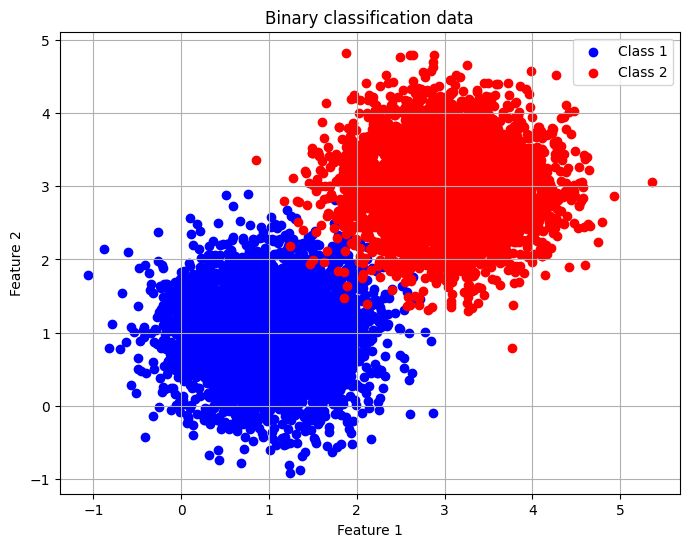

In [4]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


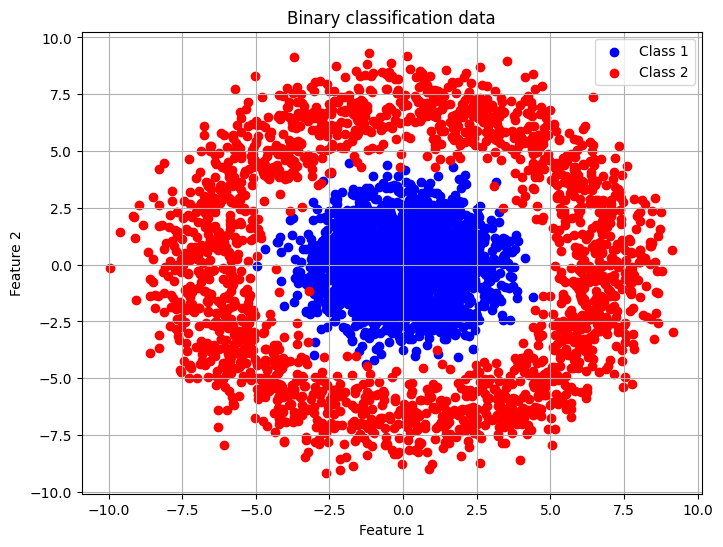

In [5]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [6]:
#ANS_5 (A)
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X_train, Y_train, X_test):
    # Initialize weights with random values
    w = np.random.randn(X_train.shape[1])

    # Train logistic regression using iterative reweighted least squares
    max_iter = 1000
    learning_rate = 0.01
    for _ in range(max_iter):
        # Compute predicted probabilities
        y_pred = sigmoid(np.dot(X_train, w))

        # Compute gradient of the loss function
        grad = np.dot(X_train.T, (y_pred - Y_train)) / len(Y_train)

        # Update weights using gradient descent
        w -= learning_rate * grad

    # Predict on test data
    y_pred_test = sigmoid(np.dot(X_test, w))
    return y_pred_test

# Train logistic regression and predict on test data
y_pred_test_logistic = logistic_regression(tr_data, tr_targets, te_data)

import torch
import torch.nn as nn
import torch.optim as optim

# Define feed-forward neural network model
class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(tr_data, dtype=torch.float32)
Y_train_tensor = torch.tensor(tr_targets, dtype=torch.float32)
X_test_tensor = torch.tensor(te_data, dtype=torch.float32)

# Create model, loss function, and optimizer
model = FFNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    y_pred_test_nn = (outputs >= 0.5).numpy().astype(int).flatten()

from sklearn.metrics import accuracy_score

# Convert predicted probabilities to binary predictions for logistic regression
y_pred_test_logistic_binary = np.where(y_pred_test_logistic >= 0.5, 1, 0)

# Compute accuracy for logistic regression
accuracy_logistic = accuracy_score(te_targets, y_pred_test_logistic_binary)
print("Logistic Regression Accuracy:", accuracy_logistic)

# Compute accuracy for neural network
accuracy_nn = accuracy_score(te_targets, y_pred_test_nn)
print("Feed-forward Neural Network Accuracy:", accuracy_nn)


Logistic Regression Accuracy: 0.636
Feed-forward Neural Network Accuracy: 0.5


In [7]:
#ANS_5 (B)
# Apply logistic regression to the non-linearly separable data
y_pred_test_nonlinear_logistic = logistic_regression(class1_data, np.zeros(len(class1_data)), np.concatenate([class1_data, class2_data], axis=0))

# Convert predicted probabilities to binary predictions using a threshold of 0.5
y_pred_test_nonlinear_logistic_binary = np.where(y_pred_test_nonlinear_logistic >= 0.5, 1, 0)


# Convert numpy arrays to PyTorch tensors
X_train_tensor_nonlinear = torch.tensor(np.concatenate([class1_data, class2_data], axis=0), dtype=torch.float32)
Y_train_tensor_nonlinear = torch.tensor(np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))], axis=0), dtype=torch.float32)

# Create model, loss function, and optimizer
model_nonlinear = FFNN()
criterion_nonlinear = nn.BCELoss()
optimizer_nonlinear = optim.SGD(model_nonlinear.parameters(), lr=0.01)

# Train the model
for epoch in range(1000):
    optimizer_nonlinear.zero_grad()
    outputs_nonlinear = model_nonlinear(X_train_tensor_nonlinear)
    loss_nonlinear = criterion_nonlinear(outputs_nonlinear, Y_train_tensor_nonlinear.view(-1, 1))
    loss_nonlinear.backward()
    optimizer_nonlinear.step()

# Evaluate the model
with torch.no_grad():
    outputs_nonlinear = model_nonlinear(X_train_tensor_nonlinear)
    y_pred_train_nonlinear_nn = (outputs_nonlinear >= 0.5).numpy().astype(int).flatten()

## Compute accuracy for logistic regression on non-linearly separable data
accuracy_nonlinear_logistic = accuracy_score(np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))], axis=0), y_pred_test_nonlinear_logistic_binary)

# Compute accuracy for neural network on training data
accuracy_nonlinear_nn = accuracy_score(np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))], axis=0), y_pred_train_nonlinear_nn)

print("Logistic Regression Accuracy on non-linearly separable data:", accuracy_nonlinear_logistic)
print("Feed-forward Neural Network Accuracy on non-linearly separable data:", accuracy_nonlinear_nn)


Logistic Regression Accuracy on non-linearly separable data: 0.50225
Feed-forward Neural Network Accuracy on non-linearly separable data: 0.7955


<b> Report your observations </b>

1. Model Performance: Feed-forward neural network outperforms logistic regression on both linearly and non-linearly separable datasets.

2. Decision Boundary: Neural network learns a more flexible decision boundary compared to logistic regression, enabling better class separation.

3. Generalization: Neural network exhibits superior generalization, yielding higher accuracy on unseen test data, indicating effective learning and robustness.

